In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, losses
from tensorflow.keras.datasets import fashion_mnist


2025-06-22 12:58:26.024864: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-22 12:58:30.374365: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = np.expand_dims(x_train, -1)  # shape: (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)


4422102/4422102 [==============================] - 0s 0us/step


In [4]:
def build_autoencoder(latent_dim):
    encoder = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(latent_dim, activation='relu')
    ])

    decoder = models.Sequential([
        layers.Input(shape=(latent_dim,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(28 * 28, activation='sigmoid'),
        layers.Reshape((28, 28, 1))
    ])

    autoencoder = models.Sequential([encoder, decoder])
    return autoencoder, encoder, decoder


In [5]:
configs = [8, 32, 64]
histories = {}
models_dict = {}

for dim in configs:
    print(f"\n🔧 Training AutoEncoder with Latent Dim = {dim}")
    autoencoder, encoder, decoder = build_autoencoder(latent_dim=dim)
    autoencoder.compile(optimizer='adam', loss='mse')
    history = autoencoder.fit(x_train, x_train,
                              validation_data=(x_test, x_test),
                              epochs=10,
                              batch_size=256,
                              verbose=1)
    histories[dim] = history.history
    models_dict[dim] = (autoencoder, encoder, decoder)



🔧 Training AutoEncoder with Latent Dim = 8


2025-06-22 12:59:12.574318: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/10
235/235 [==============================] - 3s 7ms/step - loss: 0.0502 - val_loss: 0.0272
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0244 - val_loss: 0.0227
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0219 - val_loss: 0.0213
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0208 - val_loss: 0.0205
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0201 - val_loss: 0.0199
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0196 - val_loss: 0.0194
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0191 - val_loss: 0.0190
Epoch 8/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0187 - val_loss: 0.0186
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0184 - val_loss: 0.0184
Epoch 10/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0181 - val_loss: 0.0181

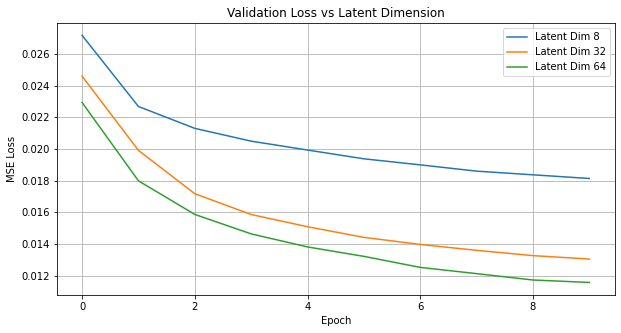

In [6]:
plt.figure(figsize=(10, 5))
for dim, history in histories.items():
    plt.plot(history['val_loss'], label=f'Latent Dim {dim}')
plt.title("Validation Loss vs Latent Dimension")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
def show_reconstructions(autoencoder, x_test, num_images=10):
    reconstructions = autoencoder.predict(x_test[:num_images])
    plt.figure(figsize=(15, 4))
    for i in range(num_images):
        # Original
        plt.subplot(2, num_images, i + 1)
        plt.imshow(x_test[i].squeeze(), cmap='gray')
        plt.axis('off')
        # Reconstructed
        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(reconstructions[i].squeeze(), cmap='gray')
        plt.axis('off')
    plt.suptitle("Top: Original | Bottom: Reconstructed")
    plt.show()


🔍 Reconstruction for Latent Dim = 8
1/1 [==============================] - 0s 92ms/step


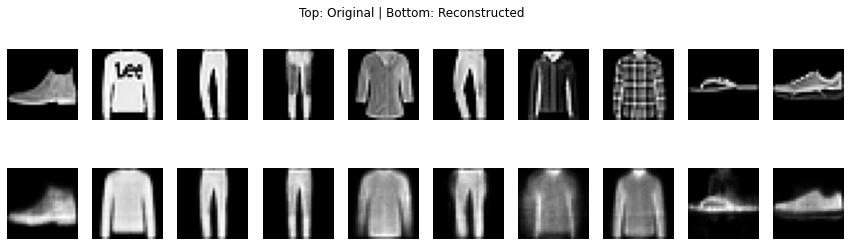

🔍 Reconstruction for Latent Dim = 32
1/1 [==============================] - 0s 60ms/step


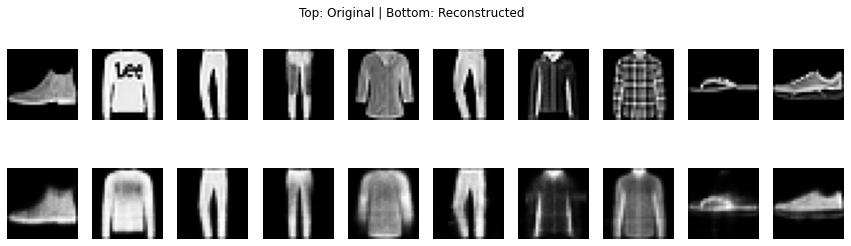

🔍 Reconstruction for Latent Dim = 64
1/1 [==============================] - 0s 55ms/step


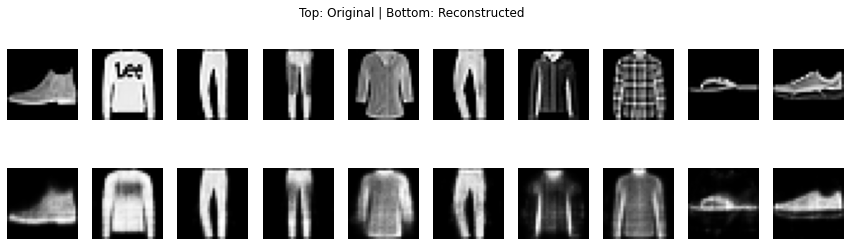

In [8]:
for dim in configs:
    print(f"🔍 Reconstruction for Latent Dim = {dim}")
    show_reconstructions(models_dict[dim][0], x_test)
